##**MVP - Análise de Dados e Boas Práticas**
####**Profs. Tatiana Escovedo e Hugo Villamizar**
####**Aluno: Carlos Yuri Martins Braga Farias**


###**1. Definição do Problema**
O dataset utilizado no projeto é o **Video Game Sales**, um dataset que contém uma lista de jogos de videogames com vendas superiores a 100 mil cópias.



***Informações sobre os atributos:***

1. **Name:** Nome do jogo

2. **Platform:** Plataforma (i.e. PC,PS4, etc.)

3. **Year:** Ano de lançamento

4. **Genre:** Gênero

5. **Publisher:** Produtora

6. **NA_Sales:** Vendas na América do Norte

7. **EU_Sales:** Vendas na Europa

8. **JP_Sales:** Vendas no Japão

9. **Other_Sales:** Vendas no resto do mundo

10. **Global_Sales:** Total de vendas

***OBS: Todas as vendas em milhões de cópias***


Para mais detalhes sobre este dataset, consulte: https://www.kaggle.com/datasets/gregorut/videogamesales

Em seguida, será realizada a importação das bibliotecas necessárias para realizar a análise do dataset.

Bibliotecas utilizadas: Pandas, Numpy, Matplotlib, Seaborn, Missingno, Sklearn

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

###**2. Carga de Dados**

Iremos usar o pacote Pandas (Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [3]:
# url a importar
url = "https://raw.githubusercontent.com/cyurimartins/Video-Game-Vendas/main/vgsales.csv"

# leitura do arquivo e criando Dataframe backup e trabalho
df = pd.read_csv(url, sep=';')
df_videogame = df

# visualizar dataframe
df_videogame.head(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,'98 Koshien,PS,1998.0,Sports,Magical Company,15,1,12,3,41
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,17,0,17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,11,9,0,3,23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,16,0,16
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0,0,17,0,17


In [4]:
# Renomeando atributos
df_videogame.rename(columns={'Name': 'nome', 'Platform': 'plataforma', 
                             'Year': 'ano_lancamento', 'Genre': 'genero', 
                             'Publisher': 'desenvolvedor', 'NA_Sales': 'na_vendas', 
                             'EU_Sales': 'eu_vendas', 'JP_Sales': 'jp_vendas', 
                             'Other_Sales': 'outros_vendas', 
                             'Global_Sales': 'total_vendas'}, inplace = True)
df_videogame


,nome,plataforma,ano_lancamento,genero,desenvolvedor,na_vendas,eu_vendas,jp_vendas,outros_vendas,total_vendas
0,'98 Koshien,PS,1998.0,Sports,Magical Company,15,1,12,3,41
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,17,0,17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,11,9,0,3,23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,16,0,16
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0,0,17,0,17
...,...,...,...,...,...,...,...,...,...,...
16593,uDraw Studio,Wii,2010.0,Misc,THQ,167,58,0,2,246
16594,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,1,1,0,0,2
16595,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,8,9,0,2,19
16596,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,157,102,0,41,3


###**3. Análise de Dados**




####**3.1. Estátisticas Descritivas**
Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [5]:
# Mostra as dimensões do dataset
df_videogame.shape

(16598, 10)

O dataset possui **16598 instâncias** e **10 atributos.**

Em seguida vamos analisar os tipos de dados do dataset. 

In [6]:
# visualizando informações do dataset
print(df_videogame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nome            16598 non-null  object 
 1   plataforma      16598 non-null  object 
 2   ano_lancamento  16327 non-null  float64
 3   genero          16598 non-null  object 
 4   desenvolvedor   16540 non-null  object 
 5   na_vendas       16598 non-null  int64  
 6   eu_vendas       16598 non-null  int64  
 7   jp_vendas       16598 non-null  int64  
 8   outros_vendas   16598 non-null  int64  
 9   total_vendas    16598 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.3+ MB
None


**Observação:**
- 4 atributos do tipo object
- 5 atributos int
- 1 atributo float

In [7]:
# visualizando o tipo de dados de cada atributo
df_videogame.dtypes

nome               object
plataforma         object
ano_lancamento    float64
genero             object
desenvolvedor      object
na_vendas           int64
eu_vendas           int64
jp_vendas           int64
outros_vendas       int64
total_vendas        int64
dtype: object

In [8]:
# visualizando as 10 primeiras linhas do dataset
df_videogame.head(10)

,nome,plataforma,ano_lancamento,genero,desenvolvedor,na_vendas,eu_vendas,jp_vendas,outros_vendas,total_vendas
0,'98 Koshien,PS,1998.0,Sports,Magical Company,15,1,12,3,41
1,.hack//G.U. Vol.1//Rebirth,PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,17,0,17
2,.hack//G.U. Vol.2//Reminisce,PS2,2006.0,Role-Playing,Namco Bandai Games,11,9,0,3,23
3,.hack//G.U. Vol.2//Reminisce (jp sales),PS2,2006.0,Role-Playing,Namco Bandai Games,0,0,16,0,16
4,.hack//G.U. Vol.3//Redemption,PS2,2007.0,Role-Playing,Namco Bandai Games,0,0,17,0,17
5,.hack//Infection Part 1,PS2,2002.0,Role-Playing,Atari,49,38,26,13,127
6,.hack//Link,PSP,2010.0,Role-Playing,Namco Bandai Games,0,0,14,0,14
7,.hack//Mutation Part 2,PS2,2002.0,Role-Playing,Atari,23,18,2,6,68
8,.hack//Outbreak Part 3,PS2,2002.0,Role-Playing,Atari,14,11,17,4,46
9,.hack//Quarantine Part 4: The Final Chapter,PS2,2003.0,Role-Playing,Atari,9,7,0,2,18


In [9]:
# Visualizando as 10 ultimas linhas do dataset
df_videogame.tail(10)

,nome,plataforma,ano_lancamento,genero,desenvolvedor,na_vendas,eu_vendas,jp_vendas,outros_vendas,total_vendas
16588,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,8,1,3,2,23
16589,th!nk Logic Trainer,Wii,2009.0,Puzzle,Conspiracy Entertainment,1,0,0,0,1
16590,thinkSMART,DS,2010.0,Misc,Conspiracy Entertainment,9,0,0,1,1
16591,thinkSMART FAMILY!,Wii,2010.0,Misc,Conspiracy Entertainment,3,0,0,0,3
16592,thinkSMART: Chess for Kids,DS,2011.0,Misc,Mentor Interactive,1,0,0,0,1
16593,uDraw Studio,Wii,2010.0,Misc,THQ,167,58,0,2,246
16594,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,1,1,0,0,2
16595,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,8,9,0,2,19
16596,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,157,102,0,41,3
16597,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,0,0,14,0,14


**Observação:**
- Após análise inicial do dataset é possível identificar que existem jogos sem ano de lançamento e desenvolvedor.

In [10]:
df_videogame.loc[(df_videogame["ano_lancamento"] == '')] 

df_videogame.tail(10)



,nome,plataforma,ano_lancamento,genero,desenvolvedor,na_vendas,eu_vendas,jp_vendas,outros_vendas,total_vendas
16588,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,8,1,3,2,23
16589,th!nk Logic Trainer,Wii,2009.0,Puzzle,Conspiracy Entertainment,1,0,0,0,1
16590,thinkSMART,DS,2010.0,Misc,Conspiracy Entertainment,9,0,0,1,1
16591,thinkSMART FAMILY!,Wii,2010.0,Misc,Conspiracy Entertainment,3,0,0,0,3
16592,thinkSMART: Chess for Kids,DS,2011.0,Misc,Mentor Interactive,1,0,0,0,1
16593,uDraw Studio,Wii,2010.0,Misc,THQ,167,58,0,2,246
16594,uDraw Studio: Instant Artist,X360,2011.0,Misc,THQ,1,1,0,0,2
16595,uDraw Studio: Instant Artist,Wii,2011.0,Misc,THQ,8,9,0,2,19
16596,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,157,102,0,41,3
16597,¡Shin Chan Flipa en colores!,DS,2007.0,Platform,505 Games,0,0,14,0,14


In [11]:
# Verificando o resumo estatístico do dataset
df_videogame.describe().round(2)

,ano_lancamento,na_vendas,eu_vendas,jp_vendas,outros_vendas,total_vendas
count,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,2006.41,24.28,13.36,7.01,4.50,48.54
std,5.83,78.35,48.22,28.78,18.47,147.46
min,1980.00,0.00,0.00,0.00,0.00,1.00
25%,2003.00,0.00,0.00,0.00,0.00,5.00
50%,2007.00,6.00,2.00,0.00,1.00,14.00
75%,2010.00,21.00,9.00,3.00,3.00,42.00
max,2020.00,4149.00,2902.00,1022.00,1057.00,8274.00


**Após o resumo estatístico podemos observar:** 
- Foi utilizado o arredondamento dos valores para padronização e simplificar a análise;
- O dataset possui amostra de dados com os jogos lançados entre 1980 e 2020; 
- A média de vendas global é 48.5 milhões de vendas;
- A América do Norte é a maior consumidora dos jogos;
- Existem titulos que não foram vendidos em alguns dos locais; 

In [12]:
# Verificando valores faltantes
valores_faltantes = df_videogame.isnull().sum()
valores_faltantes

nome                0
plataforma          0
ano_lancamento    271
genero              0
desenvolvedor      58
na_vendas           0
eu_vendas           0
jp_vendas           0
outros_vendas       0
total_vendas        0
dtype: int64

**Observação:**
- Temos 271 titulos que não possuem ano de lançamento
- 58 titulos que não possuem o nome do desenvolvedor.

In [13]:
# distribuição de jogos por plataforma
print(df_videogame.groupby('plataforma').size())

plataforma
2600     133
3DO        3
3DS      509
DC        52
DS      2163
GB        98
GBA      822
GC       556
GEN       27
GG         1
N64      319
NES       98
NG        12
PC       960
PCFX       1
PS      1196
PS2     2161
PS3     1329
PS4      336
PSP     1213
PSV      413
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii     1325
WiiU     143
X360    1265
XB       824
XOne     213
dtype: int64


**Observação:**
- Todas as plataformas possuem ao menos 1 jogo no dataset. 

####**3.2. Visualizações Unimodais**
Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

array([<Axes: xlabel='plataforma'>], dtype=object)

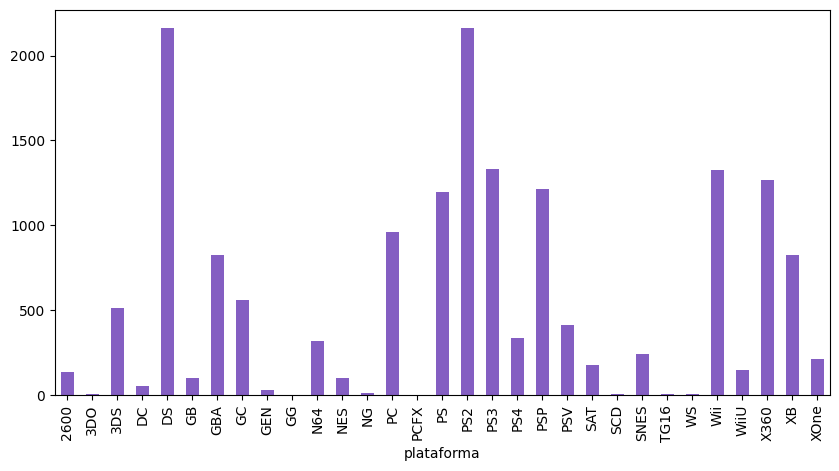

In [14]:
df_videogame.groupby(['plataforma']).size().plot.bar(color = '#845EC2', figsize=(10,5), subplots = True)

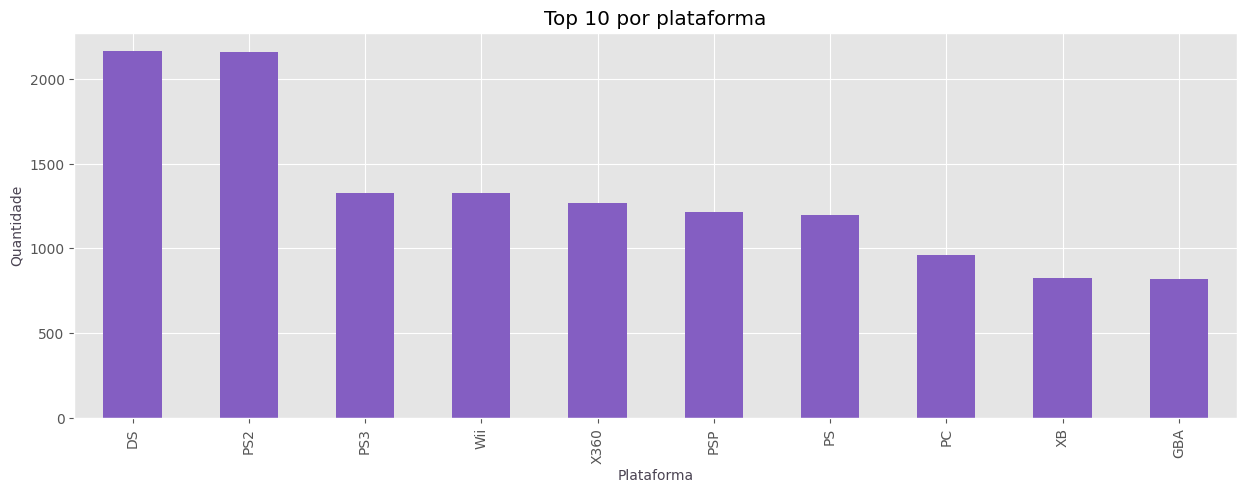

In [15]:
plt.style.use('ggplot') 
plt.figure(figsize = (15,5))
df_videogame['plataforma'].value_counts().head(10).plot.bar(color = '#845EC2', fontsize = 'medium')
plt.title('Top 10 por plataforma')
plt.xlabel('Plataforma', fontsize = 'medium', color = '#4B4453')
plt.ylabel('Quantidade', fontsize = 'medium', color = '#4B4453')
plt.show()

**Observação:**
- As plataformas **DS** e **PS2** possuem o maior número de jogos no dataset. 

In [62]:
# separando uma amostra para analisar total de vendas por plataforma
df_videogame_plataforma = df_videogame.groupby(by=['plataforma'])['total_vendas'].sum()
df_videogame_plataforma = df_videogame_plataforma.reset_index()
df_videogame_plataforma = df_videogame_plataforma.sort_values(by=['total_vendas'], ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'PS2'),
  Text(1, 0, 'X360'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'PS'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'PSP'),
  Text(8, 0, 'PS4'),
  Text(9, 0, 'PC'),
  Text(10, 0, 'XB'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'NES'),
  Text(13, 0, 'GB'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'GC'),
  Text(16, 0, 'SNES'),
  Text(17, 0, 'XOne'),
  Text(18, 0, '2600'),
  Text(19, 0, 'WiiU'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'GEN'),
  Text(23, 0, 'DC'),
  Text(24, 0, 'WS'),
  Text(25, 0, 'NG'),
  Text(26, 0, 'SCD'),
  Text(27, 0, 'TG16'),
  Text(28, 0, '3DO'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

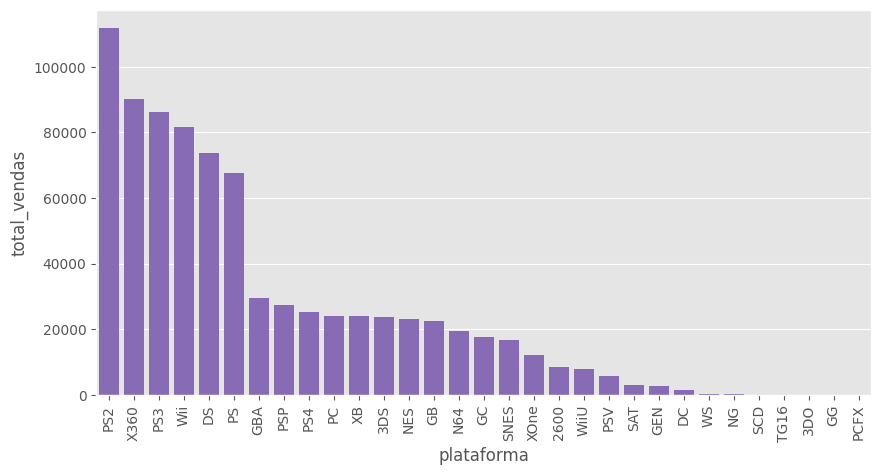

In [63]:
plt.figure(figsize=(10, 5))
sns.barplot(x="plataforma", y="total_vendas", color = '#845EC2', data=df_videogame_plataforma)
plt.xticks(rotation=90)

**Observação:**
- As plataformas que tiveram os jogos mais vendidos foram: 
1. PS2
2. X360
3. PS3

In [16]:
# distribuição por ano lancamento
print(df_videogame.groupby('ano_lancamento').size())

ano_lancamento
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     763
2005.0     941
2006.0    1008
2007.0    1202
2008.0    1428
2009.0    1431
2010.0    1259
2011.0    1139
2012.0     657
2013.0     546
2014.0     582
2015.0     614
2016.0     344
2017.0       3
2020.0       1
dtype: int64


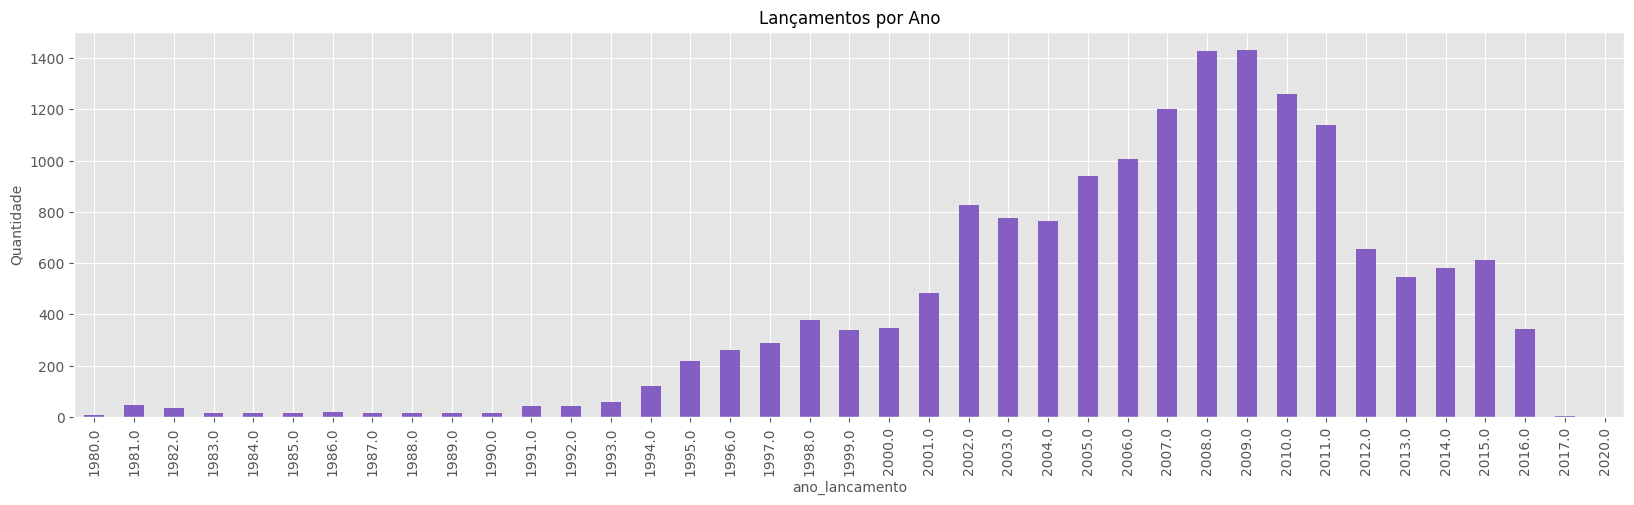

In [17]:
# gráfico de lançamentos por ano
plt.figure(figsize = (20,5))
plt.title('Lançamentos por Ano', size= 12)
plt.ylabel('Quantidade', size= 10)
plt.xlabel('Ano lançamento', size= 10)
plt.yticks(size= 10)
plt.xticks(size= 10)
df_videogame.groupby("ano_lancamento")["ano_lancamento"].count().plot(kind = "bar", color='#845EC2')
plt.show()

Ao analisar o gráfico de linha de lançamentos por ano, podemos observar que existe um aumento significativo de lançamentos após 2000 e com queda a partir de 2010. 

Agora vamos analisar o total de vendas por ano de lançamento.

In [55]:
# separando uma amostra para analisar total de vendas no ano
df_videogame_ano = df_videogame.groupby(by=['ano_lancamento'])['total_vendas'].sum()
df_videogame_ano = df_videogame_ano.reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 [Text(0, 0, '1980.0'),
  Text(1, 0, '1981.0'),
  Text(2, 0, '1982.0'),
  Text(3, 0, '1983.0'),
  Text(4, 0, '1984.0'),
  Text(5, 0, '1985.0'),
  Text(6, 0, '1986.0'),
  Text(7, 0, '1987.0'),
  Text(8, 0, '1988.0'),
  Text(9, 0, '1989.0'),
  Text(10, 0, '1990.0'),
  Text(11, 0, '1991.0'),
  Text(12, 0, '1992.0'),
  Text(13, 0, '1993.0'),
  Text(14, 0, '1994.0'),
  Text(15, 0, '1995.0'),
  Text(16, 0, '1996.0'),
  Text(17, 0, '1997.0'),
  Text(18, 0, '1998.0'),
  Text(19, 0, '1999.0'),
  Text(20, 0, '2000.0'),
  Text(21, 0, '2001.0'),
  Text(22, 0, '2002.0'),
  Text(23, 0, '2003.0'),
  Text(24, 0, '2004.0'),
  Text(25, 0, '2005.0'),
  Text(26, 0, '2006.0'),
  Text(27, 0, '2007.0'),
  Text(28, 0, '2008.0'),
  Text(29, 0, '2009.0'),
  Text(30, 0, '2010.0'),
  Text(31, 0, '2011.0'),
  Text(32, 0, '2012.0'),
  T

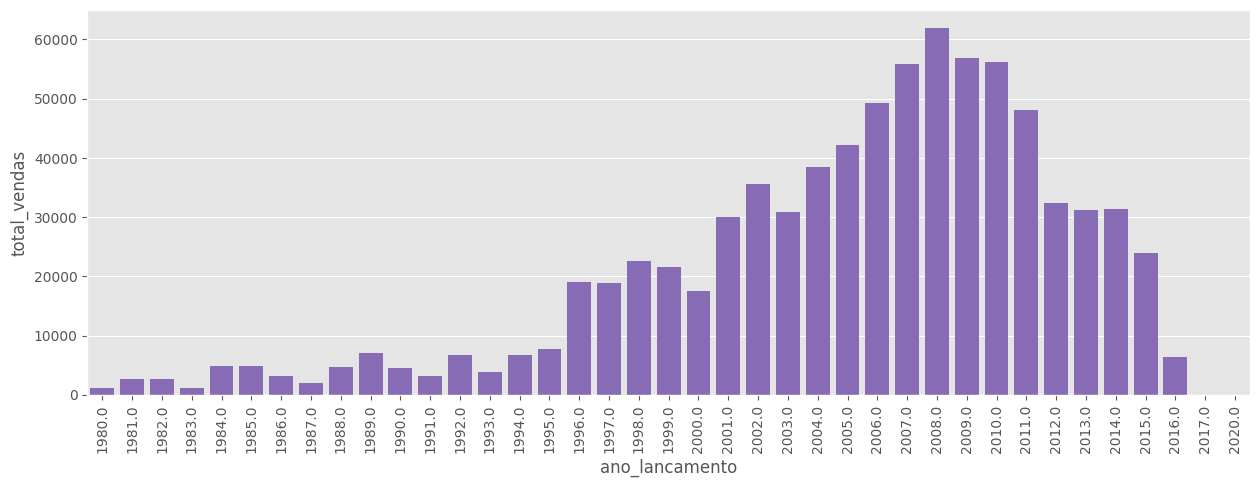

In [64]:
plt.figure(figsize=(15, 5))
sns.barplot(x="ano_lancamento", y="total_vendas", color = '#845EC2', data=df_videogame_ano)
plt.xticks(rotation=90)

**Observação:**

- Os jogos lançados em 2008 foram os mais vendidos.
- Os jogos lançados em 1983 e 1980 tiveram as piores vendas. 

In [19]:
# distribuição de jogos por genero
print(df_videogame.groupby('genero').size())

genero
Action          3316
Adventure       1286
Fighting         848
Misc            1739
Platform         886
Puzzle           582
Racing          1249
Role-Playing    1488
Shooter         1310
Simulation       867
Sports          2346
Strategy         681
dtype: int64


In [43]:
# visualizando a distribuição em ordem decrescente
df['genero'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: genero, dtype: int64

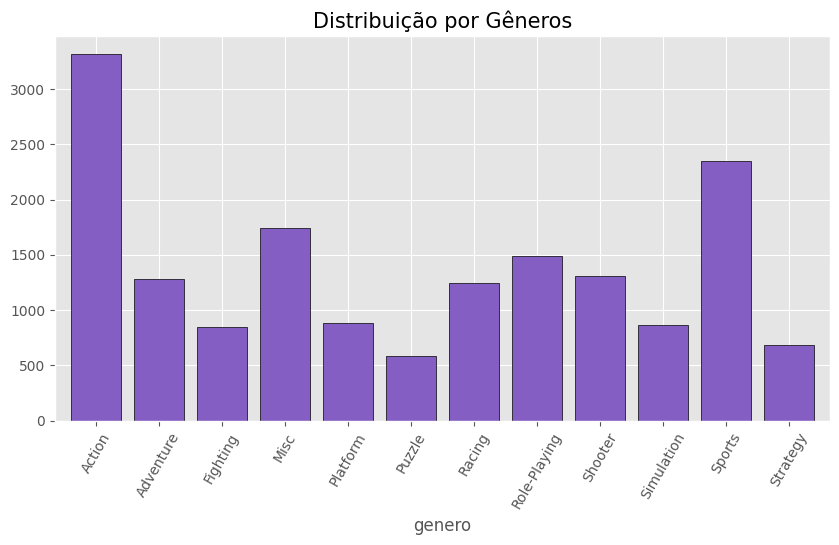

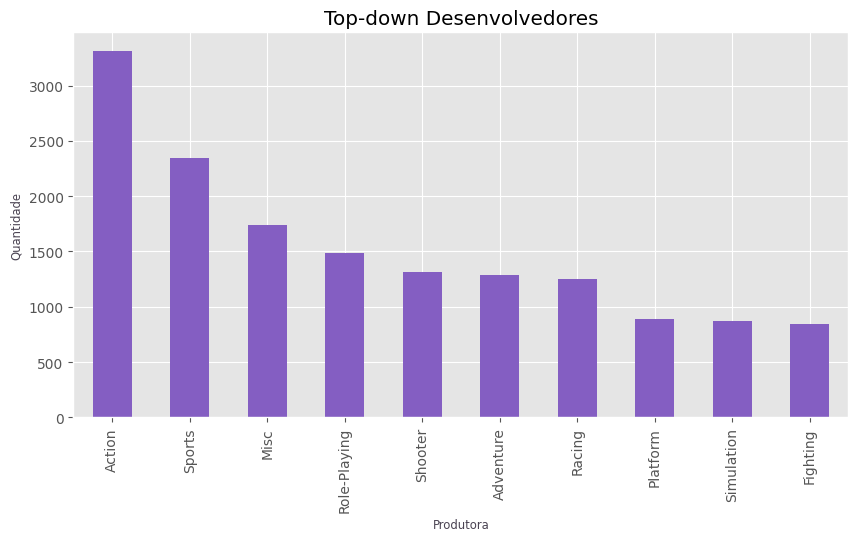

In [20]:
# verificando distribuição por gêneros
plt.figure(figsize = (10,5))
df_videogame.groupby('genero').size().plot(kind = "bar", width = 0.8, color = '#845EC2', edgecolor = 'black')
plt.title('Distribuição por Gêneros', fontsize = 15)
plt.xticks(rotation = 60)

# Analisado de o top 10 em ordem descrescente
plt.style.use('ggplot') 
plt.figure(figsize = (10,5))
df_videogame['genero'].value_counts().head(10).plot.bar(color = '#845EC2', fontsize = 'medium')
plt.title('Top-down Desenvolvedores')
plt.xlabel('Produtora', fontsize = 'small', color = '#4B4453')
plt.ylabel('Quantidade', fontsize = 'small', color = '#4B4453')

plt.show()

**Observação:**

- Podemos observar no gráfico acima que os jogos de **ação** e **esportes** estão em maior quantidade no dataset. 

In [21]:
# distribuição de jogos por desenvolvedor
print(df_videogame.groupby('desenvolvedor').size())

desenvolvedor
10TACLE Studios                  3
1C Company                       3
20th Century Fox Video Games     5
2D Boy                           1
3DO                             36
                                ..
id Software                      1
imageepoch Inc.                  2
inXile Entertainment             1
mixi, Inc                        1
responDESIGN                     2
Length: 578, dtype: int64


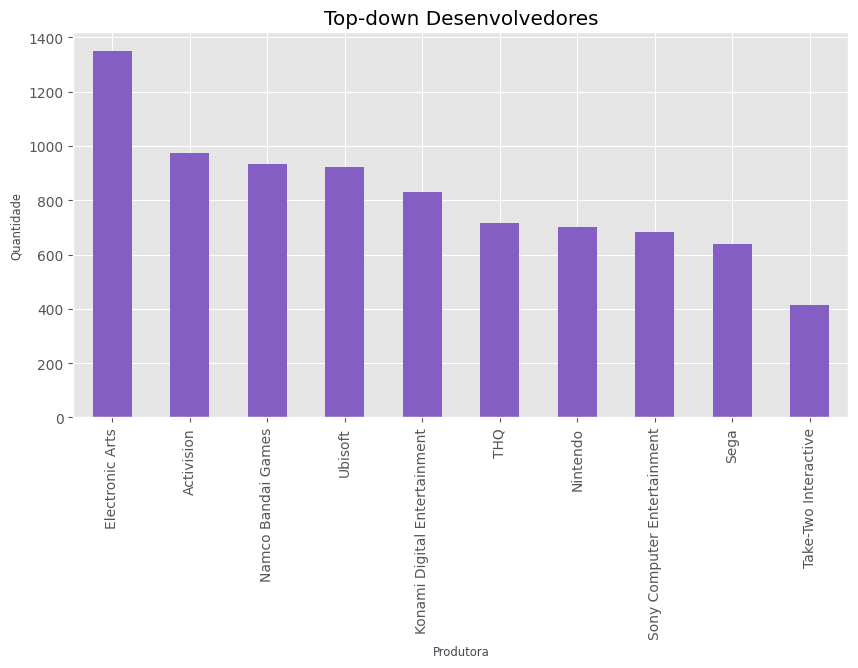

In [22]:
plt.style.use('ggplot') 
plt.figure(figsize = (10,5))
df_videogame['desenvolvedor'].value_counts().head(10).plot.bar(color = '#845EC2', fontsize = 'medium')
plt.title('Top-down Desenvolvedores')
plt.xlabel('Produtora', fontsize = 'small', color = '#4B4453')
plt.ylabel('Quantidade', fontsize = 'small', color = '#4B4453')
plt.show()

**Observação:**
- **"Eletronic Arts"** é a desenvolvedora que possui mais jogos.

In [79]:
# separando uma amostra para analisar total de vendas por desenvolvedor
df_videogame_dev = df_videogame.groupby('desenvolvedor')['total_vendas'].sum().sort_values(ascending=False).head(10)
df_videogame_dev = df_videogame_dev.reset_index()


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Microsoft Game Studios')])

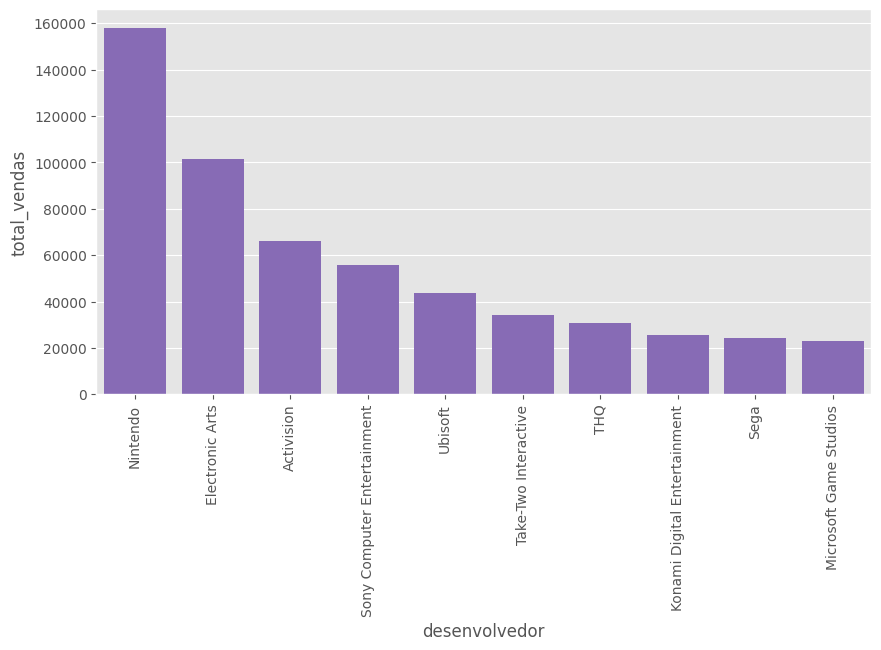

In [80]:
plt.figure(figsize=(10, 5))
sns.barplot(x="desenvolvedor", y="total_vendas", color = '#845EC2', data=df_videogame_dev)
plt.xticks(rotation=90)

**Observação:**
- A desenvolvedora **Nintendo** obteve as maiores vendas, seguido da **Eletronic Arts** e **Activision**.

#####**Explorando atributos numéricos**

Text(0.5, 1.0, 'Ano Lançamento')

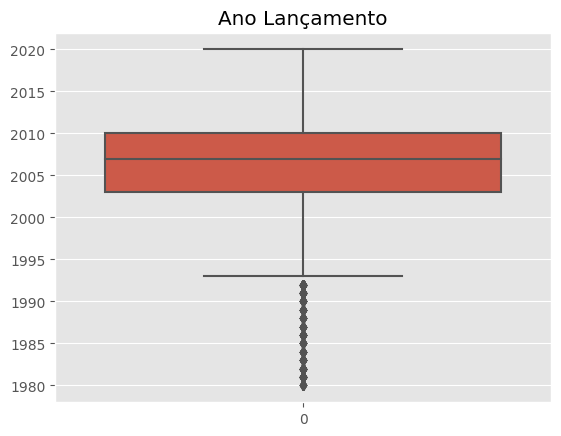

In [23]:
sns.boxplot(df_videogame['ano_lancamento']).set_title('Ano Lançamento')

Text(0.5, 1.0, 'Vendas - América do Norte')

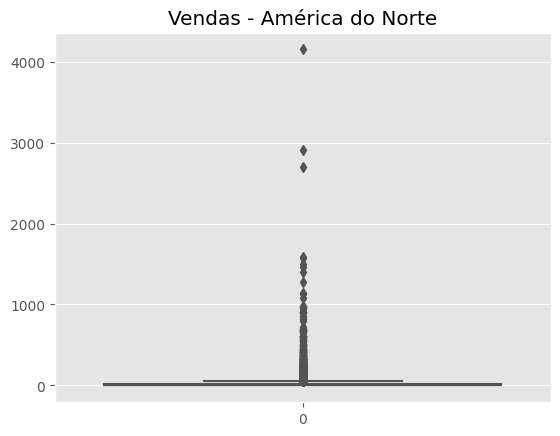

In [24]:
sns.boxplot(df_videogame['na_vendas']).set_title('Vendas - América do Norte')

Text(0.5, 1.0, 'Vendas - Europa')

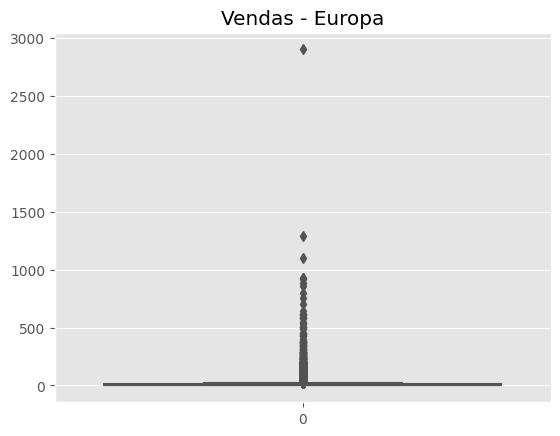

In [25]:
sns.boxplot(df_videogame['eu_vendas']).set_title('Vendas - Europa')

Text(0.5, 1.0, 'Vendas - Japão')

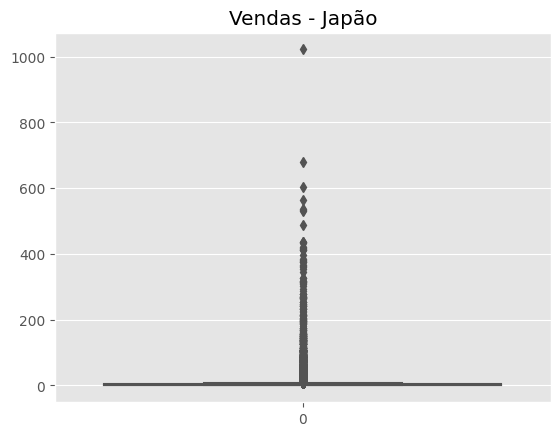

In [26]:
sns.boxplot(df_videogame['jp_vendas']).set_title('Vendas - Japão')

Text(0.5, 1.0, 'Vendas - Outros')

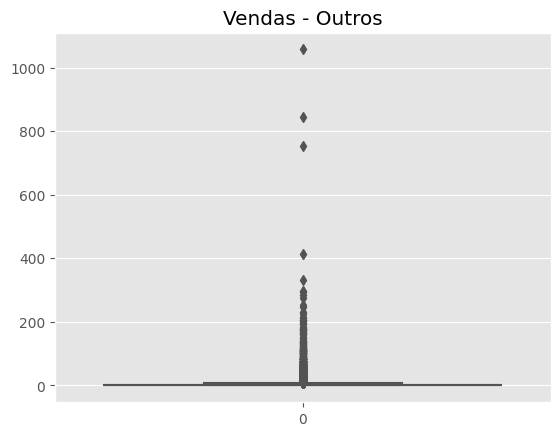

In [27]:
sns.boxplot(df_videogame['outros_vendas']).set_title('Vendas - Outros')

Text(0.5, 1.0, 'Vendas - Total')

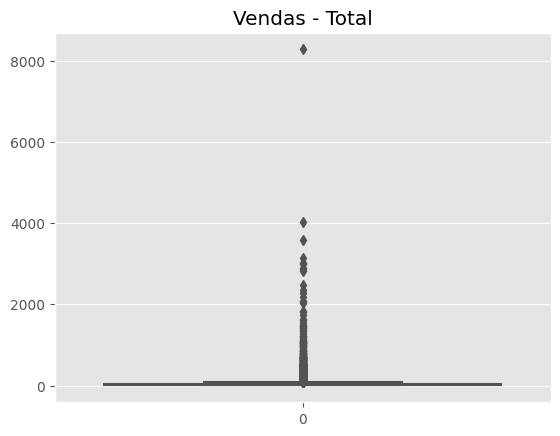

In [28]:
sns.boxplot(df_videogame['total_vendas']).set_title('Vendas - Total')

<Axes: xlabel='regiao', ylabel='vendas'>

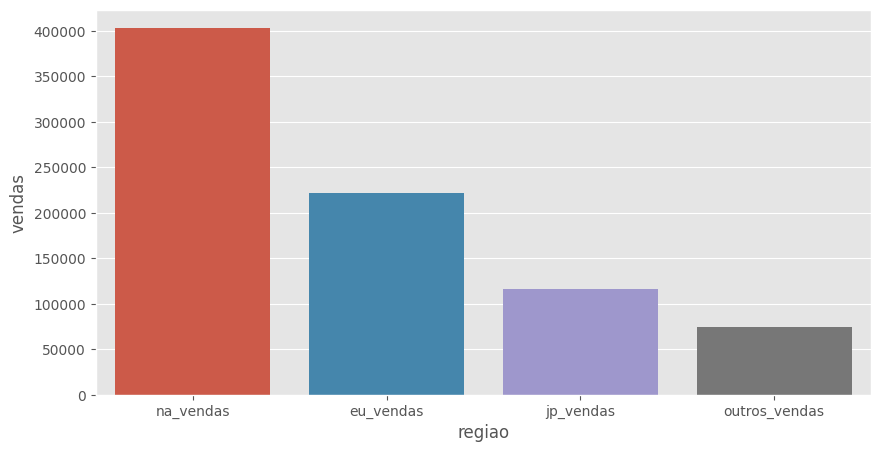

In [93]:
local_vendas = df_videogame[['na_vendas', 'eu_vendas', 'jp_vendas', 'outros_vendas']]
local_vendas = local_vendas.sum().reset_index()
local_vendas = local_vendas.rename(columns={"index": "regiao", 0: "vendas"})
local_vendas
plt.figure(figsize=(10, 5))
sns.barplot(x='regiao', y='vendas', data = local_vendas)

**Observação:** 
- **América do Norte** possui as maiores vendas. 

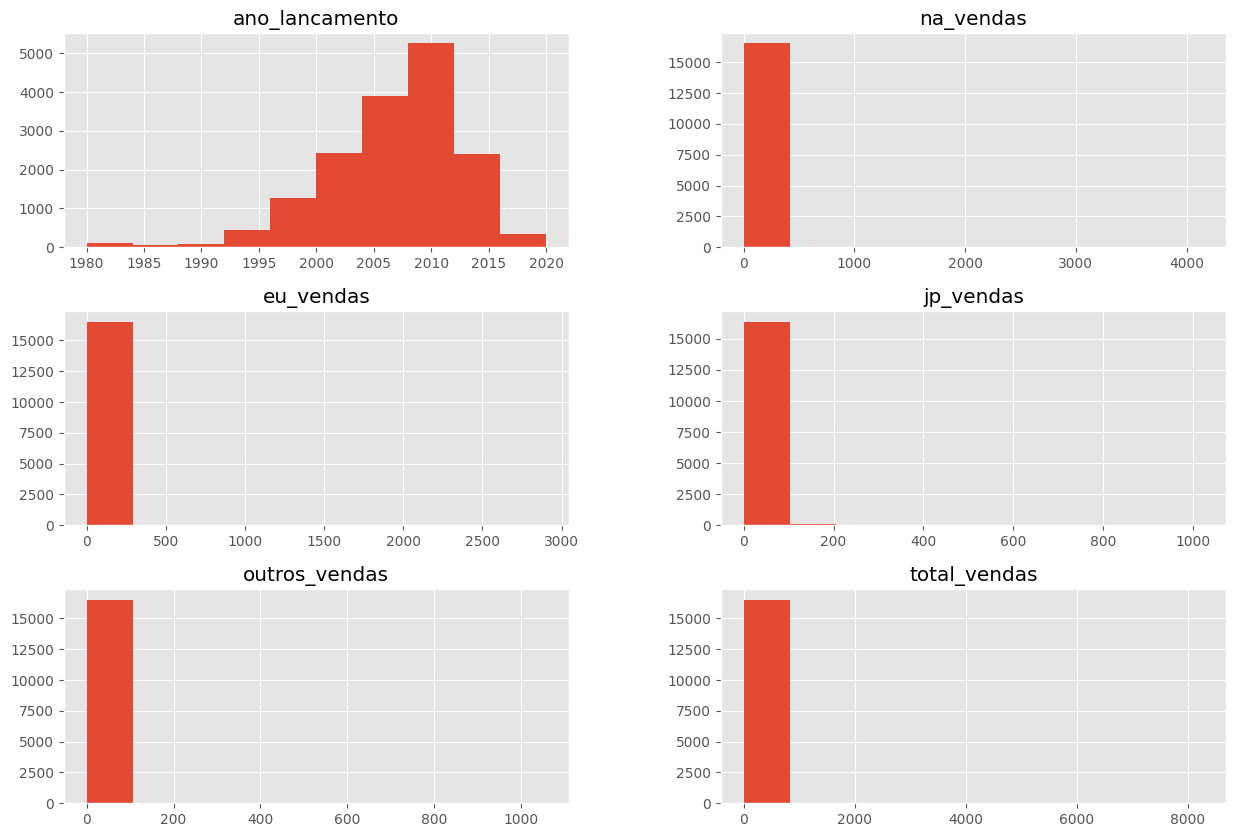

In [29]:
# Histograma
df_videogame.hist(figsize = (15,10))
plt.show()

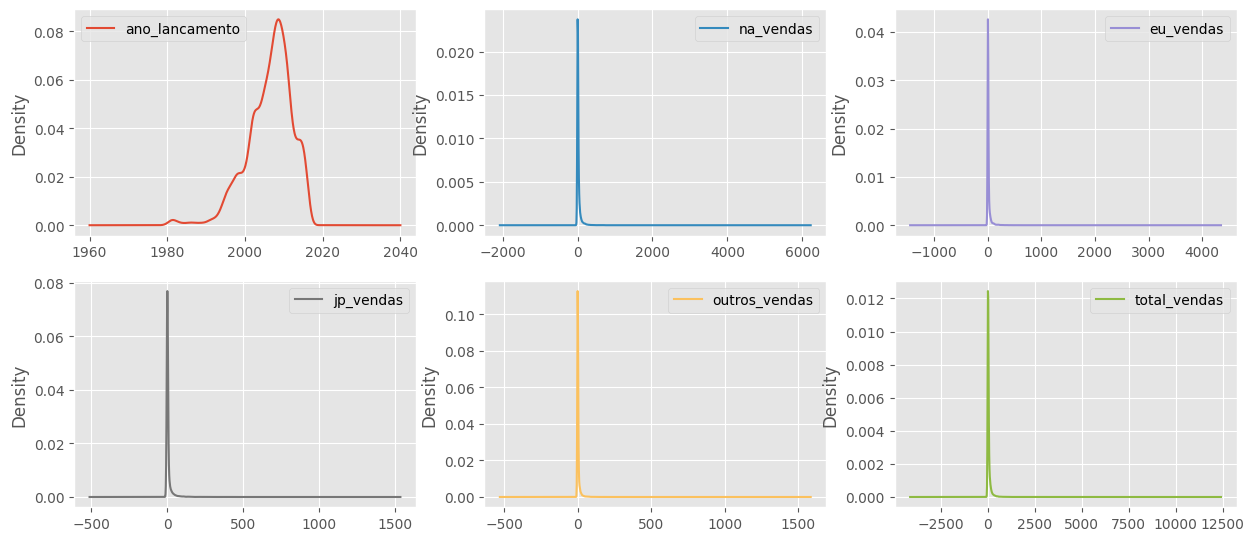

In [30]:
# Density Plot
df_videogame.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

**Observação:**
- Existe uma grande concentração de registros entre os anos de lançamento 2000 até 2020.

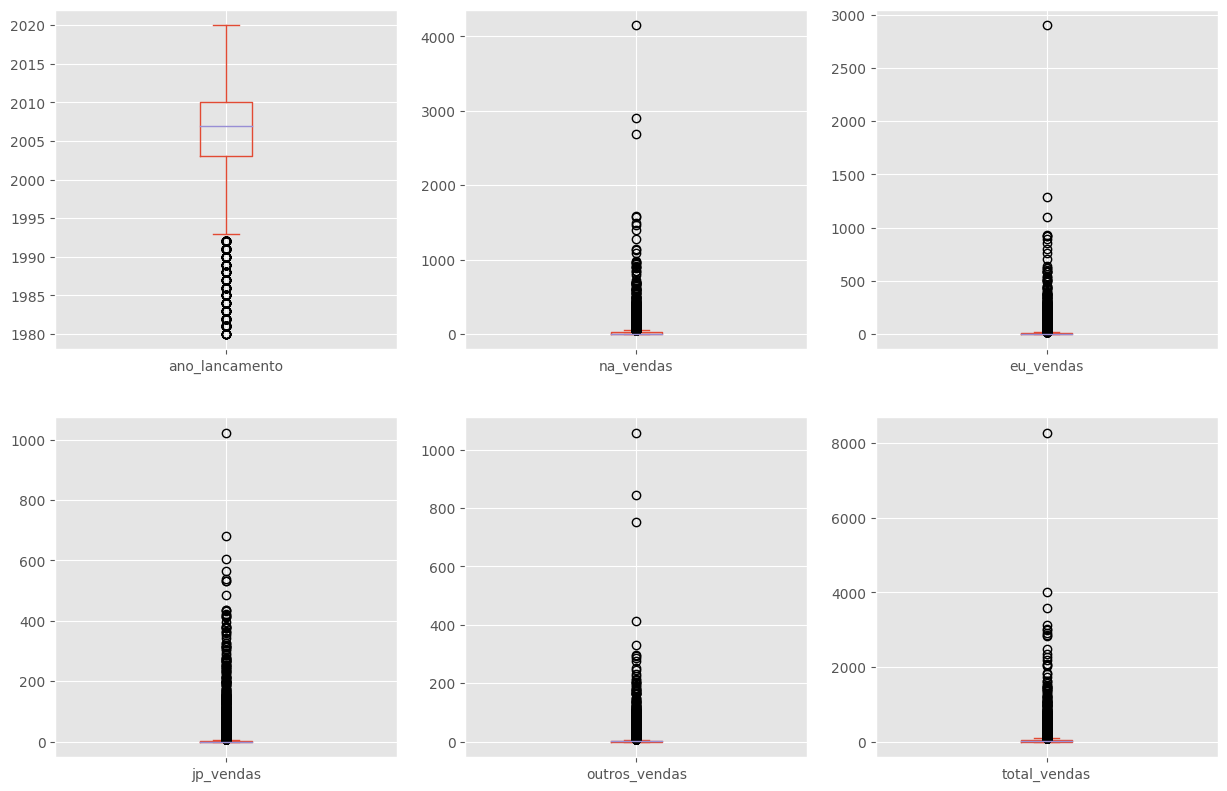

In [31]:
# Boxplot
df_videogame.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,15))
plt.show()

Ao analisar a dispersão dos dados, podemos observar alguns outliers em na_vendas, eu_vendas, jp_vendas, outros_vendas e total_vendas. 

####**3.3. Visualizações Multimodais**
- O azul ao redor da diagonal sugere que os atributos que estão próximos um do outro são geralmente mais correlacionados entre si. 
- Os vermelhos também sugerem alguma correlação negativa moderada, a medida que os atributos

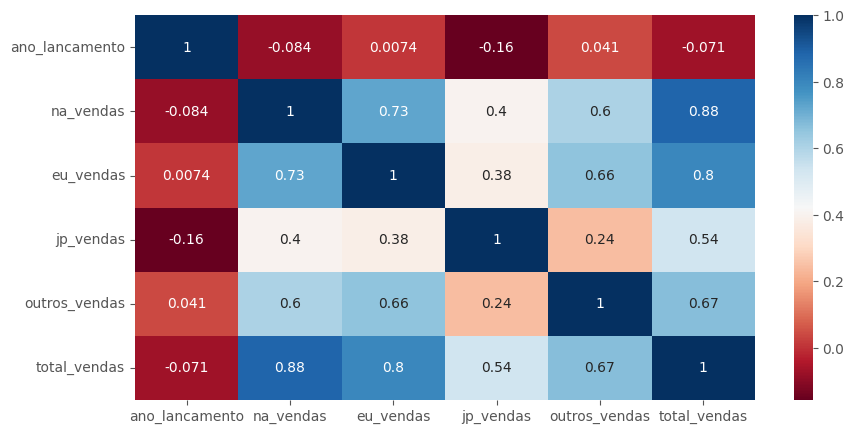

In [41]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize=(10, 5))
sns.heatmap(df_videogame.corr(), annot=True, cmap='RdBu');

**Observação:**
- Existe uma correlação na venda de jogos entre na_vendas e eu_vendas, ou seja, as 2 regiões possuem o mesmo interesse nos títulos. 
- eu_vendas e na_vendas são as regiões com as maiores vendas e com grande impacto no total.

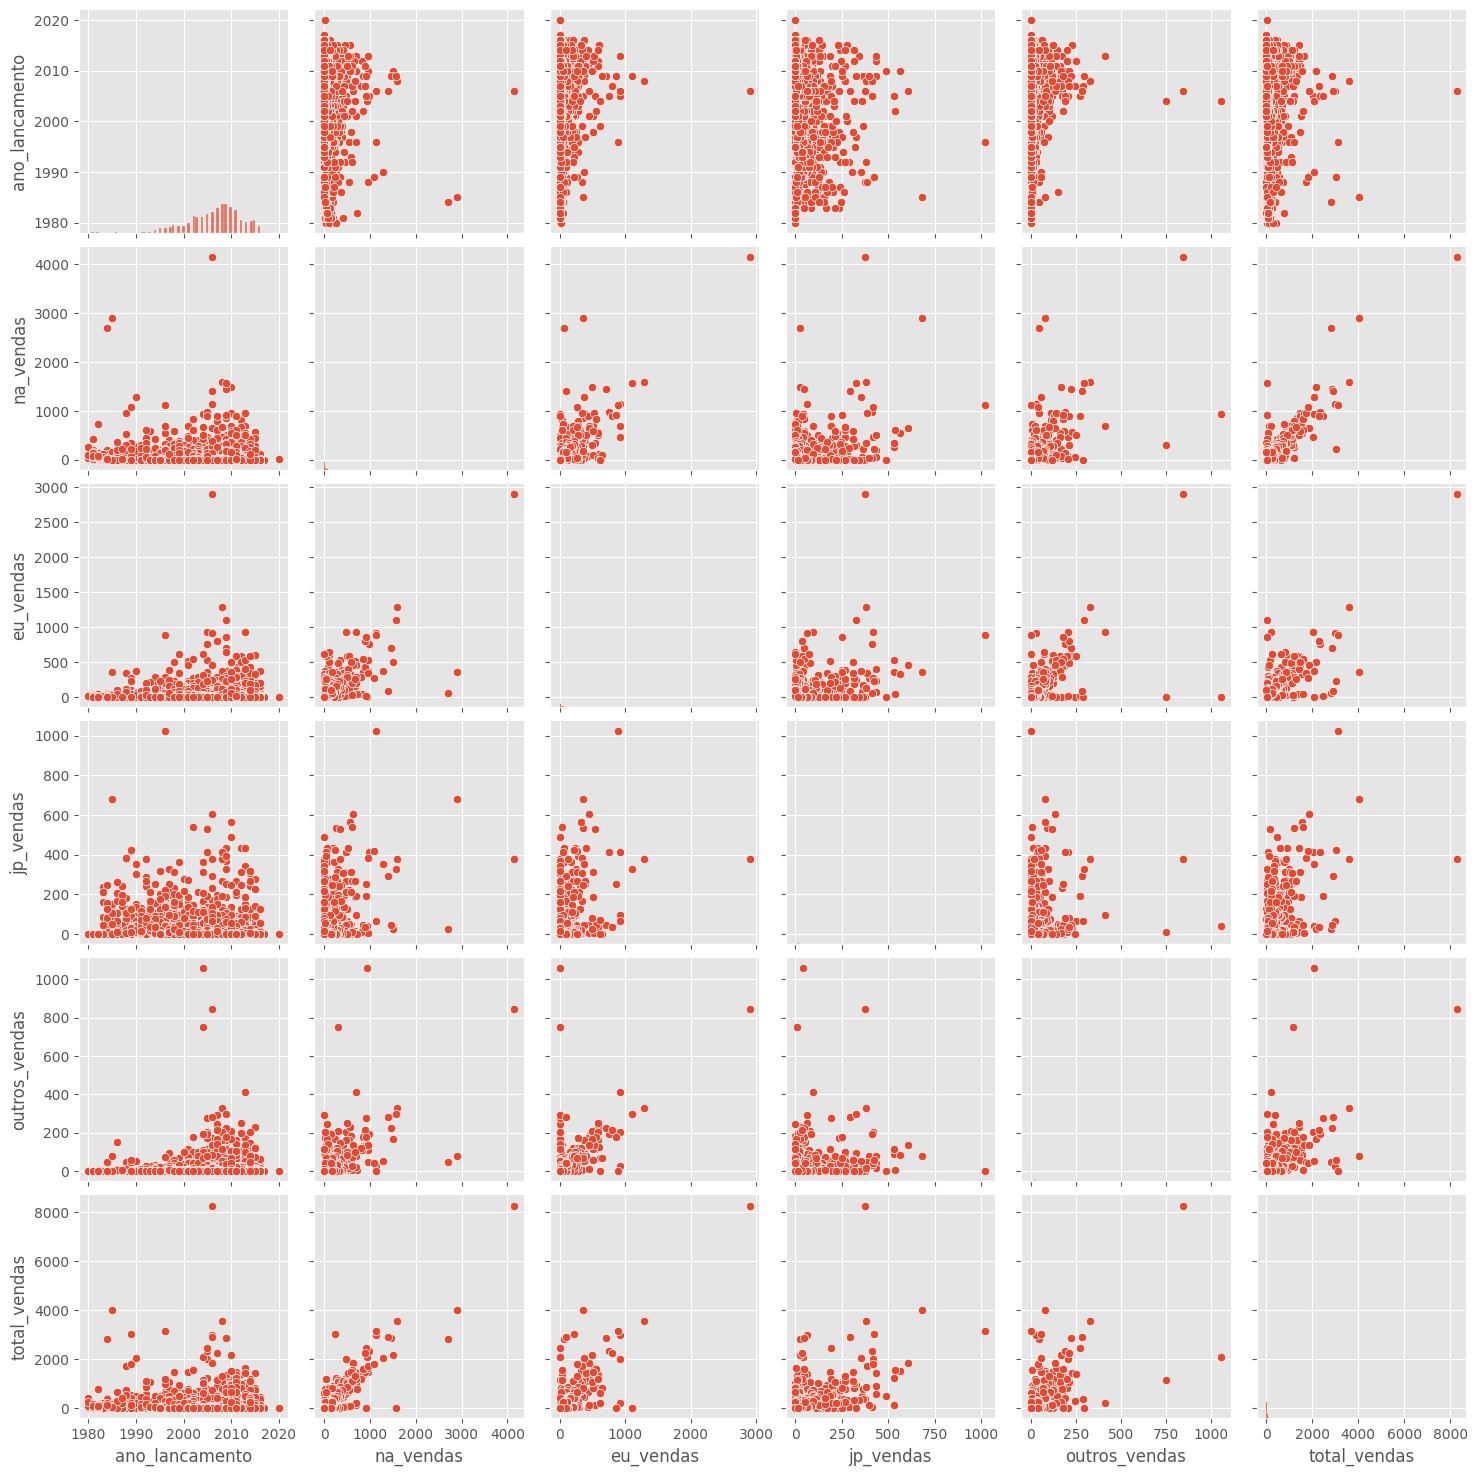

In [33]:
# Scatter Plot com Seaborn - Variação 1

sns.pairplot(df_videogame)

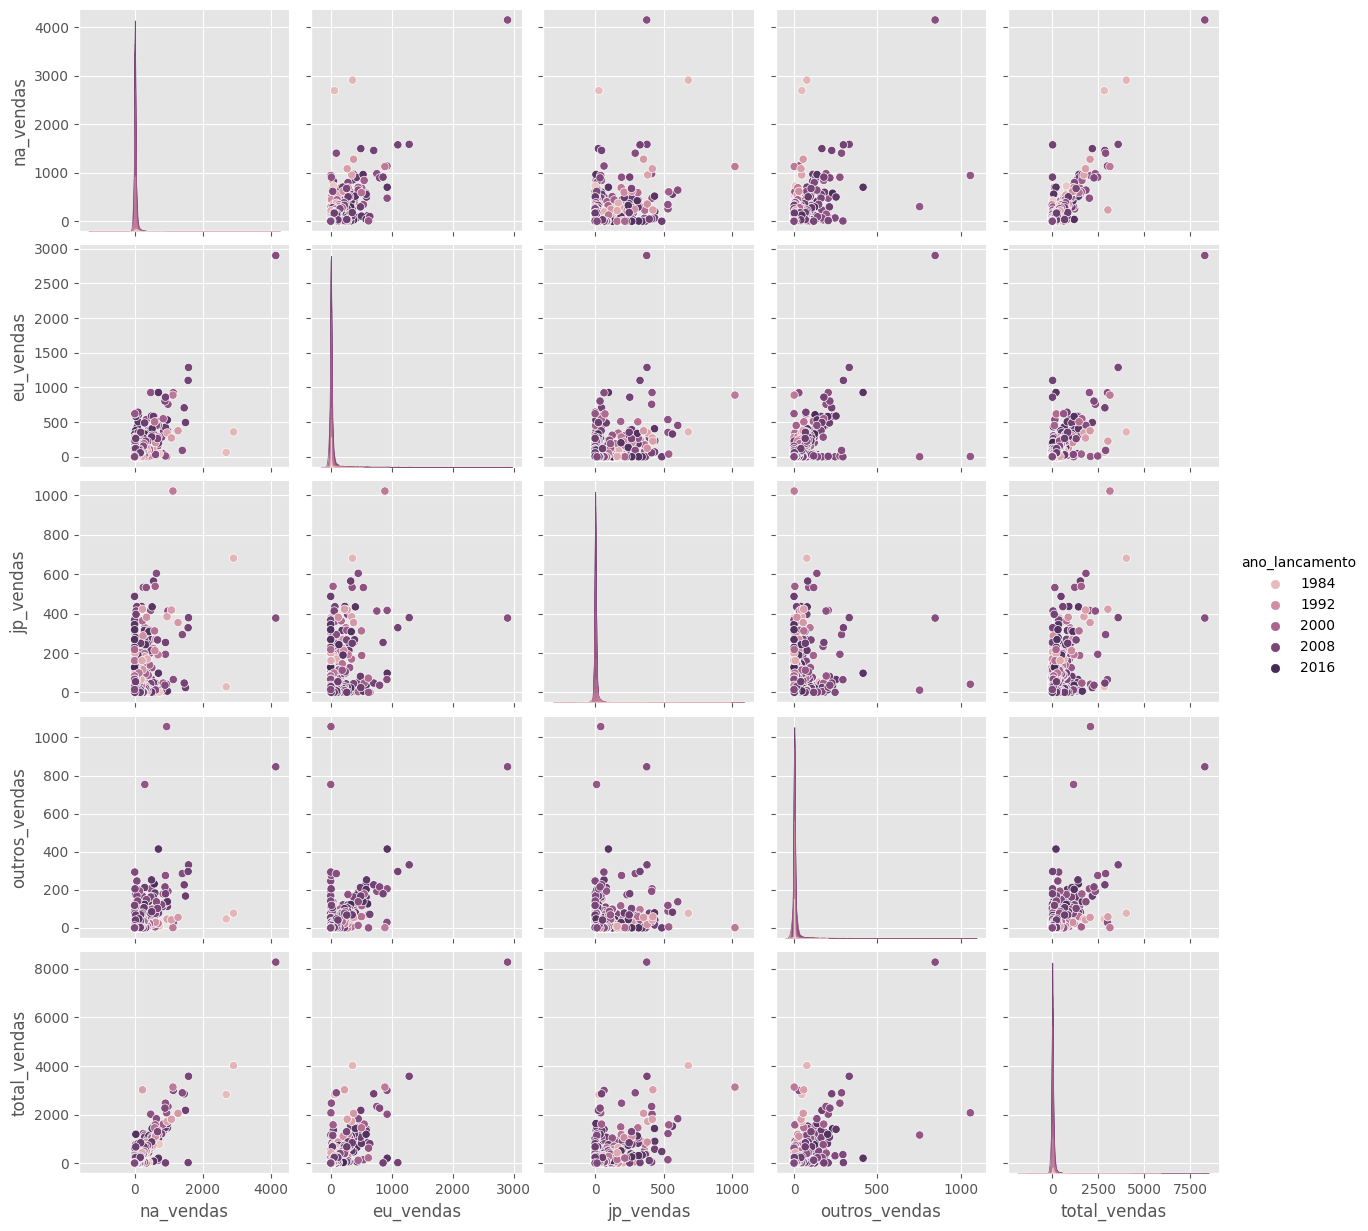

In [34]:
# Scatter Plot com Seaborn - Variação 2

sns.pairplot(df_videogame, hue = "ano_lancamento", height = 2.5);

###**4. Pré-Processamento de dados**


####**4.1. Tratamento de Missings e Limpeza**


In [35]:
# verificando nulls no dataset
df_videogame.isnull().sum()

nome                0
plataforma          0
ano_lancamento    271
genero              0
desenvolvedor      58
na_vendas           0
eu_vendas           0
jp_vendas           0
outros_vendas       0
total_vendas        0
dtype: int64

<Axes: >

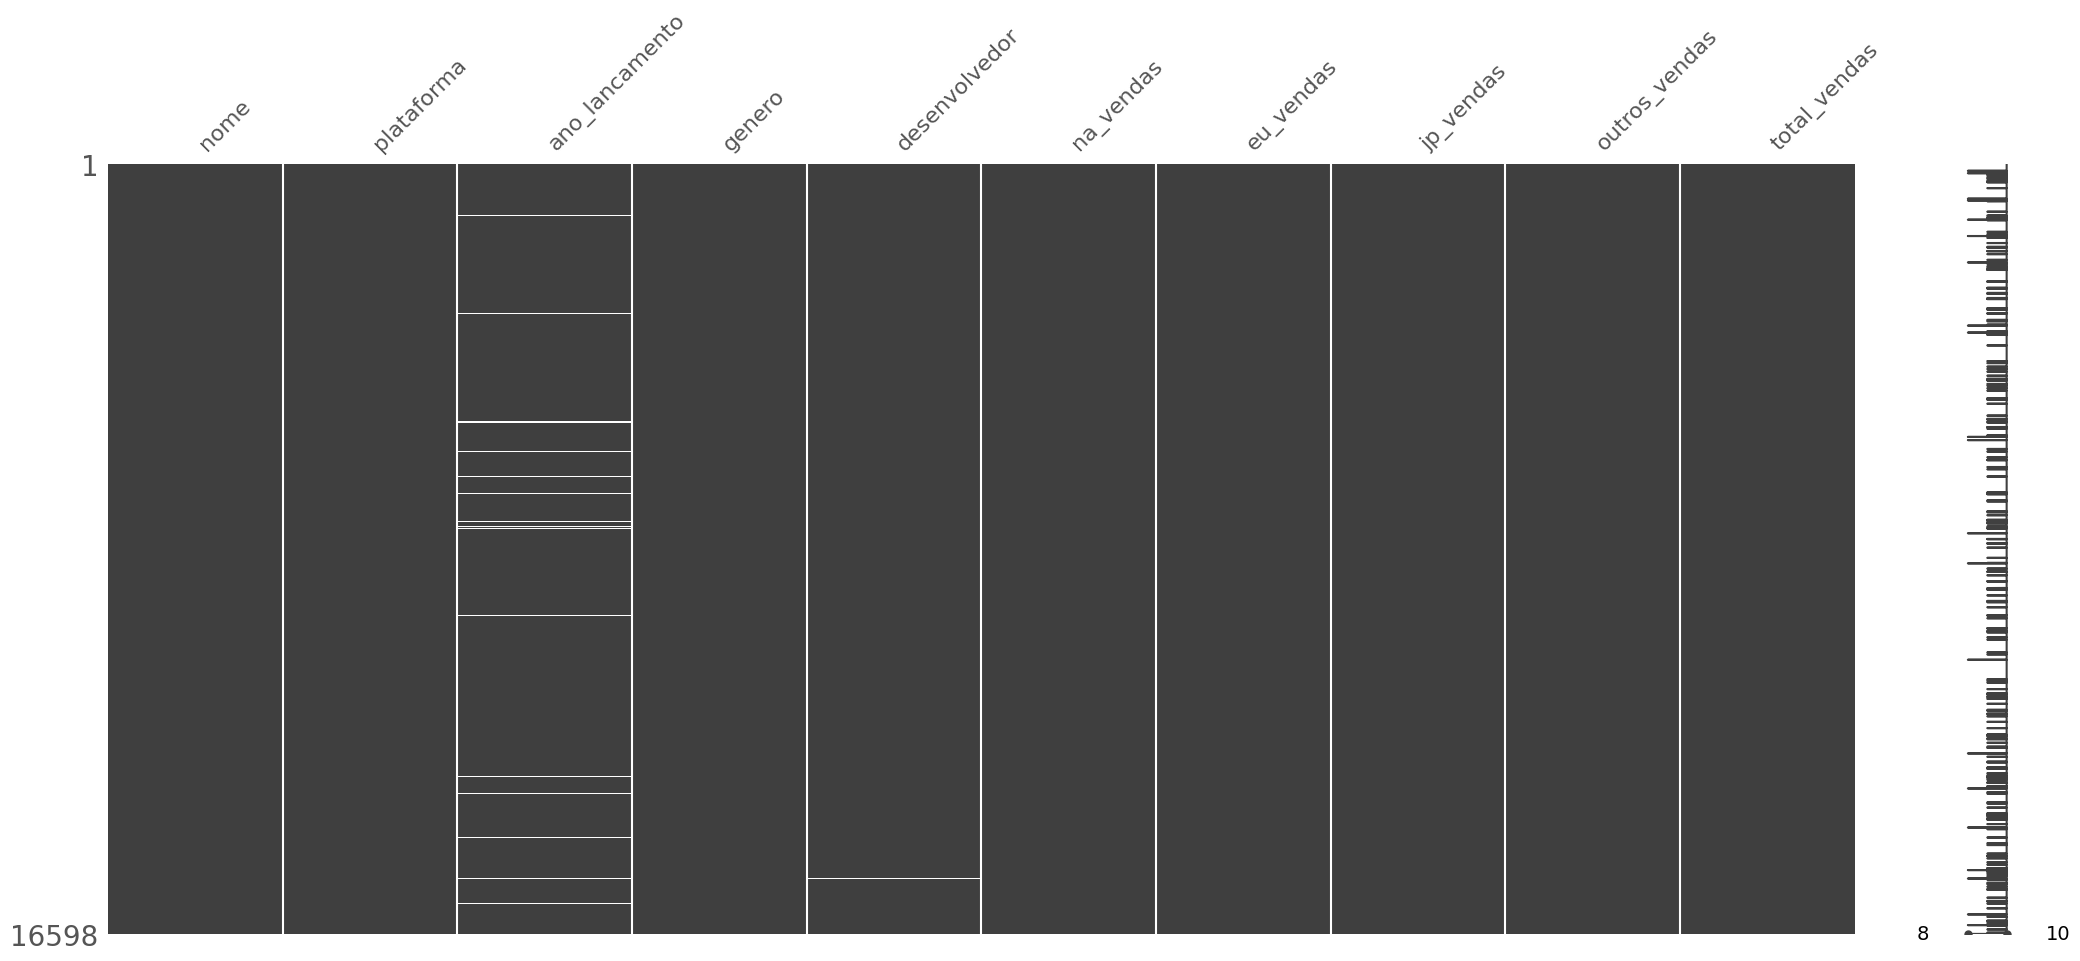

In [36]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(df_videogame)

####**4.2. Separação em conjunto de treino e conjunto de teste**

Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split.

In [37]:
test_size = 0.20
seed = 7

# Separação em conjuntos de treino e teste (dataset original)
array = df_videogame.values
X = array[:,0:8]
y = array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # sem estratificação
#X_train, X_test, y_train, y_test = train_test_split(X, y,
    #test_size=test_size, shuffle=True, random_state=seed, stratify=y) # com estratificação